## Image Classification Using ANN

In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [5]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [8]:
def plot_sample(index):
    plt.figure(figsize=(10,1))
    plt.imshow(X_train[index])

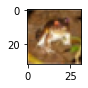

In [9]:
plot_sample(0)

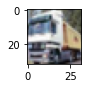

In [10]:
plot_sample(1)

In [11]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [12]:
y_train[1]

array([9], dtype=uint8)

'truck'

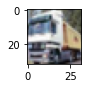

In [13]:
plot_sample(1)
classes[y_train[1][0]]

'horse'

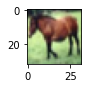

In [14]:
plot_sample(7)
classes[y_train[7][0]]

### Scaling

In [15]:
X_trained_scaled = X_train/255
X_test_scaled = X_test/255

### Encoding y_train and test samples

In [16]:
y_train_categorical = keras.utils.to_categorical(
        y_train,num_classes=10,dtype='float32'
)

y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [17]:
y_test_categorical = keras.utils.to_categorical(
        y_test,num_classes=10,dtype='float32'
)

y_test_categorical[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [18]:
X_trained_scaled.shape

(50000, 32, 32, 3)

In [19]:
32*32*3

3072

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer="SGD",
             loss = 'categorical_crossentropy',
              metrics=['accuracy']
             )

model.fit(X_trained_scaled,y_train_categorical,epochs=50)

2022-09-05 15:12:18.703381: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-05 15:12:18.740900: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-05 15:12:18.792313: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ubuntu): /proc/driver/nvidia/version does not exist
2022-09-05 15:12:38.564982: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 36864000 exceeds 10% of free system memory.
2022-09-05 15:12:41.198912: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 36864000 exceeds 10% of free system memory.
2022-09-05 15:12:41.394897: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 36864000 exceeds 10% of free system memory.
